<a href="https://colab.research.google.com/github/sri7683/Hello-world/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import re
import pydicom
import pylibjpeg
import matplotlib.patches as patches
from matplotlib import pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_1 = pd.read_csv("/content/drive/MyDrive/config/tables/EMBED_OpenData_clinical.csv") 
df2 = pd.read_csv("/content/drive/MyDrive/config/tables/EMBED_OpenData_metadata_reduced.csv")

<ipython-input-5-1dbf4aa76023>:1: DtypeWarning: Columns (28,31,33,48,49,53,54,55,56,57,59,81,84,85,93,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("/content/drive/MyDrive/config/tables/EMBED_OpenData_clinical.csv")
<ipython-input-5-1dbf4aa76023>:2: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/drive/MyDrive/config/tables/EMBED_OpenData_metadata_reduced.csv")


In [20]:
df_clinical = df_1[['empi_anon','acc_anon','study_date_anon','asses', 'tissueden',
                          'desc','side','path_severity','numfind','total_L_find','total_R_find',
                          'massshape','massmargin','massdens','calcfind','calcdistri','calcnumber',
                          'ETHNICITY_DESC','ETHNIC_GROUP_DESC','age_at_study','ETHNIC_GROUP_DESC']]
df_clinical.head(5)

,empi_anon,acc_anon,study_date_anon,asses,tissueden,desc,side,path_severity,numfind,total_L_find,...,massshape,massmargin,massdens,calcfind,calcdistri,calcnumber,ETHNICITY_DESC,ETHNIC_GROUP_DESC,age_at_study,ETHNIC_GROUP_DESC
0,60696029,8099128854014801,2013-12-30,A,3.0,MG Diagnostic Right,R,NaN,1,0.0,...,S,D,NaN,NaN,NaN,0,African American or Black,"Unreported, Unknown, Unavailable",69.652354,"Unreported, Unknown, Unavailable"
1,90986305,5156106114290009,2013-08-26,P,3.0,MG Diagnostic Left,L,NaN,1,1.0,...,F,NaN,NaN,NaN,NaN,0,African American or Black,"Unreported, Unknown, Unavailable",42.741466,"Unreported, Unknown, Unavailable"
2,78097721,3065491565033830,2013-02-19,N,3.0,MG Screening Bilateral w/CAD,NaN,NaN,1,0.0,...,NaN,NaN,NaN,NaN,NaN,0,Caucasian or White,Non-Hispanic or Latino,60.967713,Non-Hispanic or Latino
3,43734324,1878527667143380,2013-02-08,A,3.0,MG Screening Bilateral w/CAD,R,2.0,1,0.0,...,NaN,NaN,NaN,G,NaN,0,African American or Black,Non-Hispanic or Latino,56.329699,Non-Hispanic or Latino
4,28410573,8493926076199113,2013-02-18,B,3.0,MG Screening Bilateral w/CAD,B,NaN,1,1.0,...,O,U,NaN,NaN,NaN,0,Asian,Non-Hispanic or Latino,50.544501,Non-Hispanic or Latino


In [14]:
df_metadata = df2[['anon_dicom_path','empi_anon','acc_anon','study_date_anon','StudyDescription','SeriesDescription','FinalImageType','ImageLateralityFinal','ViewPosition','spot_mag','ROI_coords','num_roi']]

In [15]:
df_merge = pd.merge(df_metadata, df_clinical, on=['acc_anon'])

In [21]:
print(df_merge.describe().T)
df_merge.head(5)

                  count          mean           std           min  \
empi_anon_x    546580.0  5.510909e+07  2.607878e+07  1.000088e+07   
acc_anon       546580.0  5.475716e+15  2.596867e+15  1.000032e+15   
spot_mag        53980.0  1.000000e+00  0.000000e+00  1.000000e+00   
num_roi        546580.0  2.257675e-02  1.674260e-01  0.000000e+00   
empi_anon_y    546580.0  5.510979e+07  2.607973e+07  1.000088e+07   
tissueden      543023.0  2.450939e+00  7.647817e-01  1.000000e+00   
path_severity   32307.0  2.463491e+00  1.745506e+00  0.000000e+00   
numfind        546580.0  1.150836e+00  4.794635e-01  0.000000e+00   
total_L_find   546580.0  4.600827e-01  8.365406e-01  0.000000e+00   
total_R_find   546580.0  4.406162e-01  7.818027e-01  0.000000e+00   
calcnumber     546580.0 -4.347031e-03  1.618602e-01 -6.000000e+00   
age_at_study   545089.0  5.836127e+01  1.219379e+01  1.931593e+01   

                        25%           50%           75%           max  
empi_anon_x    3.253410e+07  5

,anon_dicom_path,empi_anon_x,acc_anon,study_date_anon_x,StudyDescription,SeriesDescription,FinalImageType,ImageLateralityFinal,ViewPosition,spot_mag,...,massshape,massmargin,massdens,calcfind,calcdistri,calcnumber,ETHNICITY_DESC,ETHNIC_GROUP_DESC,age_at_study,ETHNIC_GROUP_DESC
0,/mnt/NAS2/mammo/anon_dicom/cohort_1/66685715/1...,66685715,7208547536889815,2017-05-15 00:00:00,MG Screening Bilateral,L MLO,2D,L,MLO,NaN,...,NaN,NaN,NaN,NaN,NaN,0,Caucasian or White,"Unreported, Unknown, Unavailable",43.428681,"Unreported, Unknown, Unavailable"
1,/mnt/NAS2/mammo/anon_dicom/cohort_1/66685715/1...,66685715,7208547536889815,2017-05-15 00:00:00,MG Screening Bilateral,R CC,2D,R,CC,NaN,...,NaN,NaN,NaN,NaN,NaN,0,Caucasian or White,"Unreported, Unknown, Unavailable",43.428681,"Unreported, Unknown, Unavailable"
2,/mnt/NAS2/mammo/anon_dicom/cohort_1/66685715/1...,66685715,7208547536889815,2017-05-15 00:00:00,MG Screening Bilateral,L MLO,2D,L,MLO,NaN,...,NaN,NaN,NaN,NaN,NaN,0,Caucasian or White,"Unreported, Unknown, Unavailable",43.428681,"Unreported, Unknown, Unavailable"
3,/mnt/NAS2/mammo/anon_dicom/cohort_1/66685715/1...,66685715,7208547536889815,2017-05-15 00:00:00,MG Screening Bilateral,L CC,2D,L,CC,NaN,...,NaN,NaN,NaN,NaN,NaN,0,Caucasian or White,"Unreported, Unknown, Unavailable",43.428681,"Unreported, Unknown, Unavailable"
4,/mnt/NAS2/mammo/anon_dicom/cohort_1/66685715/1...,66685715,7208547536889815,2017-05-15 00:00:00,MG Screening Bilateral,R MLO,2D,R,MLO,NaN,...,NaN,NaN,NaN,NaN,NaN,0,Caucasian or White,"Unreported, Unknown, Unavailable",43.428681,"Unreported, Unknown, Unavailable"


In [22]:
print(df_merge.isnull().sum())

anon_dicom_path              0
empi_anon_x                  0
acc_anon                     0
study_date_anon_x            0
StudyDescription             0
SeriesDescription          465
FinalImageType               0
ImageLateralityFinal         0
ViewPosition              8725
spot_mag                492600
ROI_coords                   0
num_roi                      0
empi_anon_y                  0
study_date_anon_y            0
asses                        0
tissueden                 3557
desc                         0
side                    279610
path_severity           514273
numfind                      0
total_L_find                 0
total_R_find                 0
massshape               440773
massmargin              522997
massdens                530107
calcfind                502883
calcdistri              525749
calcnumber                   0
ETHNICITY_DESC            1491
ETHNIC_GROUP_DESC         1491
age_at_study              1491
ETHNIC_GROUP_DESC         1491
dtype: i

In [23]:
#Rename Dataset to Label to make it easy to understand
df_merge = df_merge.rename(columns={'asses':'Label'})
print(df_merge.dtypes)

anon_dicom_path          object
empi_anon_x               int64
acc_anon                  int64
study_date_anon_x        object
StudyDescription         object
SeriesDescription        object
FinalImageType           object
ImageLateralityFinal     object
ViewPosition             object
spot_mag                float64
ROI_coords               object
num_roi                   int64
empi_anon_y               int64
study_date_anon_y        object
Label                    object
tissueden               float64
desc                     object
side                     object
path_severity           float64
numfind                   int64
total_L_find            float64
total_R_find            float64
massshape                object
massmargin               object
massdens                 object
calcfind                 object
calcdistri               object
calcnumber                int64
ETHNICITY_DESC           object
ETHNIC_GROUP_DESC        object
age_at_study            float64
ETHNIC_G

In [24]:
# Dropping columns
df_dropped = df_merge.drop(columns=['anon_dicom_path', 'ETHNIC_GROUP_DESC', 'ETHNIC_GROUP_DESC', 'ETHNICITY_DESC', 'calcdistri', 'calcfind', 'massdens', 'massmargin', 'massshape', 'side', 'desc', 'study_date_anon_y', 'ROI_coords', 'ViewPosition', 'ImageLateralityFinal', 'FinalImageType', 'SeriesDescription', 'StudyDescription', 'study_date_anon_x'])


In [26]:
print(df_dropped.dtypes)

empi_anon_x        int64
acc_anon           int64
spot_mag         float64
num_roi            int64
empi_anon_y        int64
Label             object
tissueden        float64
path_severity    float64
numfind            int64
total_L_find     float64
total_R_find     float64
calcnumber         int64
age_at_study     float64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

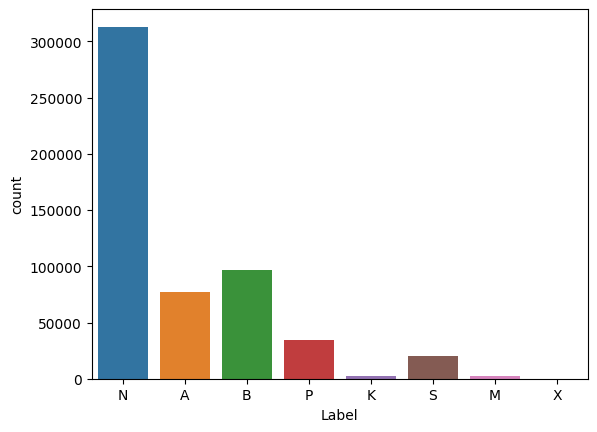

In [25]:
#Understand the data 
sns.countplot(x="Label", data=df_dropped) #M - malignant   B - benign

In [30]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df_dropped['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df_dropped["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # A=0, B=1, K=2, M=3, N=4, P=5, S=6, X=7
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  N    313136
B     96281
A     77526
P     34762
S     20457
M      2233
K      2035
X       150
Name: Label, dtype: int64
Labels before encoding are:  ['A' 'B' 'K' 'M' 'N' 'P' 'S' 'X']
Labels after encoding are:  [0 1 2 3 4 5 6 7]


In [35]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df_dropped.drop(labels = ["Label", "empi_anon_x", "num_roi", "empi_anon_y", "acc_anon"], axis=1) 
print(X.describe().T) #Needs scaling

                  count       mean        std        min        25%  \
spot_mag        53980.0   1.000000   0.000000   1.000000   1.000000   
tissueden      543023.0   2.450939   0.764782   1.000000   2.000000   
path_severity   32307.0   2.463491   1.745506   0.000000   0.000000   
numfind        546580.0   1.150836   0.479464   0.000000   1.000000   
total_L_find   546580.0   0.460083   0.836541   0.000000   0.000000   
total_R_find   546580.0   0.440616   0.781803   0.000000   0.000000   
calcnumber     546580.0  -0.004347   0.161860  -6.000000   0.000000   
age_at_study   545089.0  58.361273  12.193792  19.315934  48.718317   

                     50%        75%   max  
spot_mag        1.000000   1.000000   1.0  
tissueden       2.000000   3.000000   5.0  
path_severity   4.000000   4.000000   5.0  
numfind         1.000000   1.000000   9.0  
total_L_find    0.000000   1.000000  20.0  
total_R_find    0.000000   1.000000  12.0  
calcnumber      0.000000   0.000000   7.0  
age_at_s

In [36]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[       nan 0.25              nan ... 0.         0.46153846 0.34602956]
 [       nan 0.25              nan ... 0.         0.46153846 0.34602956]
 [       nan 0.25              nan ... 0.         0.46153846 0.34602956]
 ...
 [       nan 0.5               nan ... 0.         0.46153846 0.37353277]
 [       nan 0.5               nan ... 0.         0.46153846 0.37353277]
 [       nan 0.5               nan ... 0.         0.46153846 0.37353277]]


In [37]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (409935, 8)
Shape of testing data is:  (136645, 8)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [40]:
model = Sequential()
model.add(Dense(4, input_dim=8, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
6406/6406 [==============================] - 24s 4ms/step - loss: nan - accuracy: 0.1421 - val_loss: nan - val_accuracy: 0.1411
Epoch 2/100
6406/6406 [==============================] - 19s 3ms/step - loss: nan - accuracy: 0.1421 - val_loss: nan - val_accuracy: 0.1411
Epoch 3/100
6406/6406 [==============================] - 17s 3ms/step - loss: nan - accuracy: 0.1421 - val_loss: nan - val_accuracy: 0.1411
Epoch 4/100
6406/6406 [==============================] - 16s 3ms/step - loss: nan - accuracy: 0.1421 - val_loss: nan - val_accuracy: 0.1411
Epoch 5/100
6406/6406 [==============================] - 20s 3ms/step - loss: nan - accuracy: 0.1421 - val_loss: nan - val_accuracy: 0.1411
Epoch 6/100
6406/6406 [==============================] - 16s 3ms/step - loss: nan - accuracy: 0.1421 - val_loss: nan - val_accuracy: 0.1411
Epoch 7/100
6406/6406 [==============================] - 17s 3ms/step - loss: nan - accuracy: 0.1421 - val_loss: nan - val_accuracy: 0.1411
Epoch 8/100
6406/640